## Matplotlib

### Généralités

Jusque ce tutoriel, vous avez peut-être été un peu frustrés des affichages que nous avons utilisés, car bon, afficher des longues listes de données de manière brute n'est pas toujours drôle ... Dans ce tutoriel, nous allons enfin apprendre à tracer des graphes :

* en commençant par la base : un tracé d'une ligne.
* on verra ensuite comment formater les figures pour les rendre plus belles.
* on examinera ensuite comment faire des tracés plus avancés : les images, les `scatter`, les `patch` et les surfaces 3d.
* on regardera comment exporter ces figures en un format utilisable ailleurs
* et enfin on évoquera les tracés animés ou interactifs sous Jupyter.

Les tracés sous Matplotlib sont gérés par le sous-module `matplotlib.pyplot`, que nous devons tout d'abord importer avant de tracer quoi que ce soit. Ce sous-module contient des objets de type `Figure`, `Axes`, `Lines`, qui sont les briques élémentaires nous permettant de construire un graphe. Les `Figure` peuvent contenir un ou plusieurs `Axes`, qui sont des zones de tracés [vous pouvez les voir comme des paires d'axes $(Oxy)$ ou $(Oxyz)$], qui eux-mêmes peuvent contenir chacun plusieurs `Lines` (ou d'ailleurs, d'autres objets). Le diagramme ci-dessous vous indique, à gauche, les liens _logiques_ qui existent entre ces différents _objets_ : les `Axes`, par exemple, _appartiennent_ à un objet `Figure` qui est son _parent_, et _possèdent_ des objets `Lines` qui sont leurs _enfants_. À droite, j'ai indiqué la hiérarchie _visuelle_ entre ces objets : les lignes sont bien tracées le long d'une paire d'axes, qui est elle-même placées dans la `Figure` générale. 

![img](./resources/figure_hierarchy.png)

------------------------------------------------------------

### Tracé d'une figure simple avec `.plot()`

_"Comment est-ce que tout cela fonctionne en pratique si je veux juste tracer mes données ?_", me direz-vous ? Eh bien, allons-y : 

* on va d'abord créer une `Figure` avec la commande `plt.figure()` directement 
* on va ensuite y ajouter des `Axes`: on appelle pour cela une _méthode_ des `Figure` nommée `add_axes()`.
* et pour _tracer_ des données dans des `Axes`, on va appeler une _méthode_ des `Axes`, par exemple simplement `plot`.



La méthode `add_axes()` nécessite un argument obligatoire en entrée, qui la position de l'objet `Axes` dans la `Figure` selon la convention `[bord gauche, bord bas, largeur, hauteur] `. Tous ces paramètres prennent des valeurs relatives de 0 à 1:
* pour le bord gauche, $0$ va placer les axes tout à gauche, et $1$ va placer les axes tout à droite. 
* pour le bord du bas, c'est $0$ tout en bas et $1$ tout en haut
* pour la largeur, $0$ est infiniment fin et $1$ prend toute la largeur
* et il en va de même pour la hauteur des `Axes`
Je vous conseille de laisser de la marge aux bords pour les axes, notamment si vous voulez donner un nom à l'axe $x$ et $y$ de vos `Axes`. Un choix raisonnable de valeurs est : `[0.15,0.15,0.7,0.7]`. 

On appelle ensuite la méthode `.plot()` des axes. Celle-ci peut prendre en entrée des tableaux Numpy, __mais s'en sort également bien avec les colonnes de tableaux Pandas, des listes en Python pur, etc__, donc il est relativement indépendant de la manière dont vous gérez vos nombres sous Python. 

Ma méthode est peut-être un peu pédestre pour les habitués de MATLAB, mais vous verrez, cela va nous éviter de nous emmêler les pinceaux plus tard si on veut rajouter des choses dans des graphes :-). 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,2*np.pi,500)
y = np.cos(x)

my_fig = plt.figure()
my_ax = my_fig.add_axes([0.15,0.15,0.7,0.7])
my_line = my_ax.plot(x,y)

Même sans rien demander, notre environnement de travail a compris qu'il fallait à un moment afficher notre figure. Sympa, non ? Vous pouvez ensuite tout à fait ajouter des nouvelles lignes à vos `Axes` initiaux depuis une nouvelle cellule, mais dans ce cas il va vous falloir demander de re-tracer une nouvelle fois la `Figure` qui contient ces `Axes`. On peut faire ça en écrivant juste `my_fig` en dernier dans la cellule :

In [ ]:
z = np.sin(x)
my_other_line = my_ax.plot(x,z)
my_fig

Certains d'entre vous, les plus hackeurs probablement, vont paniquer : les bords des axes ont disparu ! En fait, non, ne vous inquiétez pas. Si vous avez choisi un thème _sombre_ pour votre éditeur de code, sachez que lors de l'appel à `my_fig`, le pourtour de la figure est transparent. Les nombres des axes étant noirs, ils deviennent invisibles lors de l'affichage... Gloups ! C'est peut-être le moment de changer pour le magnifique thème [Solarized-light](https://ethanschoonover.com/solarized/) :-) . 

Si vous voulez aller un peu plus vite et obtenir directement une `Figure` et des `Axes`, vous pouvez utiliser la commande `plt.subplots()` avec un `s` à la fin. Dans ce cas, Matplotlib va placer l'`Axes` automatiquement. Une chose en moins à gérer ! 

In [ ]:
fig, ax = plt.subplots()
line = ax.plot(x,3*z)

-----------------------------------------------

### Formater les figures 

Dans la figure précédente, on a laissé Matplotlib faire plein de choix au niveau de la taille des figures à l'épaisseur des lignes. Mais sachez que quasiment tout dans ces figures est modifiable. Nous allons voir dans cette section ce que l'on peut modifier dans les `Lines`, puis les `Axes`, puis les `Figure` et même `Matplotlib.pyplot()` lui-même (si si !). Si vous voulez une antisèche rapide, jetez un oeil au graphe ci-dessous, qui liste la plupart des propriétés que vous voudrez éditer et la manière d'y accéder. 


#### Les Lignes

Il est possible de régler l'aspect de chaque ligne, son épaisseur, les éventuels marqueurs ainsi que la couleur de tous ces objets. Voyons donc dans l'ordre comment régler toutes ces choses !

##### Épaisseur, tirets, marqueurs

Pour changer le format de votre ligne, vous pouvez l'effectuer lors de l'appel à `.plot()`, en lui passant l'argument `'linestyle'`. Vous avez alors le choix entre une ligne pleine `'-'`, des tirets `'--'`, des pointillés `':'`, ou un trait mixte `'-.'`, voire rien du tout avec `'None'`. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), linestyle =':')

Pour changer l'épaisseur de votre trait, rajoutez l'argument `linewidth` lors de l'appel à `.plot()`. Par défaut, l'épaisseur de 1 choisie par Matplotlib est en effet un peu grosse : 

In [ ]:
x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), linewidth=0.5)

Vous pouvez décider également d'ajouter des marqueurs, en ajoutant l'option `'marker'`. Vous avez alors le choix entre `'x'` (un x), `'+'` (un +, pardi), `'*'` (une étoile, bien sûr), `'s'` (un carré), `'d'` (un losange), `'o'` (un cercle), `'v'`, `'>'`, `'<'`, `'^'` (des triangles qui pointent dans diverse directions), [et bien d'autres ...](https://matplotlib.org/stable/api/markers_api.html). Si vous voulez tracer juste les marqueurs et non la ligne qui va avec, n'oubliez pas de préciser `linestyle='None'` !

In [ ]:
x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), marker='d', linestyle ='None')

##### Couleurs

Vous pouvez également spécifier la couleur d'une ligne au moment où vous la tracez. Pour spécifier une couleur de ligne lors du tracé, ajoutez l'option `color` et précisez-lui une couleur. Vous pouvez spécifier les couleurs : 

* Par un nom _bref_ d'une lettre à la façon de MATLAB, avec `'b'` (bleu), `'r'` (rouge), `'g'` (vert), `'y'` (jaune), `'c'` (cyan), `'m'` (magenta), `'w'` (blanc), `'k'` (noir)
* Via un nom de couleur HTML, par exemple `'orchid'` ou `'peru'` (_si, si !_). La liste complète de ces couleurs est [disponible ici](https://www.w3schools.com/colors/colors_names.asp).
* En précisant un code hexadécimal pour la couleur. Ces codes sont du type `#RRGGBB` au format hexadécimal, c'est à dire en base 16. Vous pouvez rapidement convertir des triplets `R,G,B` (chacun allant de 0 à 255) en code hexadécimal, même [sur Google](https://www.google.com/search?q=rgb+to+hex). Ce code devra être compris entre des guillemets pour être correctement interprété.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), color='r')                     # MATLAB-style color
line = ax.plot(x,np.sin(x+np.pi/3), color='goldenrod')     # HTML named color : yes, goldenrod is a color !
line = ax.plot(x,np.sin(x+2*np.pi/3), color='#55aaFF')     # RGB values if you want maximum flexibility 

Si vous avez des marqueurs, comment est-ce que ça marche ? L'option `color` va remplir la ligne et le marqueur d'une couleur uniforme. Mais, si vous êtes un esthète comme moi, vous aurez peut-être plus envie de préciser une couleur pour _le bord_ du marqueur appelée `markeredgecolor`, et une autre pour le _fond_ de celui-ci `markerfacecolor`. Si vous êtes encore plus un furieux, sachez que vous pouvez également régler l'épaisseur _du trait du bord du marqueur_, `markeredgewidth`, qui vaut également 1 par défaut. Certains marqueurs, comme `'+'` et `'x'`, n'ont pas d'_intérieur_, il n'est donc pas nécessaire de régler leur `markerfacecolor`. 

Essayez de jouer avec la figure suivante pour la rendre moins moche ! Une bonne approche consiste à choisir comme couleur de bord une version 'un peu plus sombre' de la couleur du fond du marqueur. 

In [ ]:
x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), linestyle='--', marker='s', markeredgecolor='teal', markerfacecolor='orange', markeredgewidth=3)      

__Exercice__ : 

* Que se passe-t-il si je précise à la fois `color`, `markeredgecolor` et `markerfacecolor` ? Est-ce que certains choix de couleurs sont 'écrasées' en fonction de l'ordre d'appel des arguments ?

#### Les Axes 

Les Axes sont le coeur de Matplotlib, donc ne soyez pas épouvanté.e.s devant la longue liste de choses qu'il est possible d'éditer. Nous allons nous concentrer sur certaines propriétés-clé, sachant que nous avons déjà vu comment _placer_ nos `Axes` dans la figure*. Contrairement aux objets `Lines`, il est plus utile de formater les axes _après_ les avoir créés. On va donc appeler tout un tas de _méthodes_ du type `ax.set_machin()` afin de rendre nos figures encore plus belles !

<small>* si vous n'êtes pas content de la position de vos axes, vous pouvez les bouger avec la méthode `ax.set_position()` après avoir tracé vos données </small>

##### Limites en x et y

Préciser les limites de vos axes est assez simple ! Pour cela, vous pouvez utiliser les méthodes `ax.set_xlim()` et `ax.set_ylim()`. Ceux-ci prennent en entrée une liste de deux nombres, le second étant, vous l'aurez deviné, plus grand que le premier... logique. Étant une personne très positive, je n'aime pas trop la partie négative des graphes, je choisis donc : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x))
ax.set_xlim([0,6])
ax.set_ylim([0,1])

__Exercice__ : Rétablissez l'équilibre cosmique de l'axe $y$, et essayez de choisir une valeur de $x$ maximale qui tombe exactement sur une (demi)-période de ma fonction.

##### Etiquettes des axes et titre

Les étiquettes de données et les titres ne sont pas des simples chaînes de caractères, et les objets qui leur correspondent sont en fait assez difficiles à trouver dans la hiérarchie des figures. Matplotlib nous fournit donc gracieusement les trois méthodes `ax.set_xlabel()`, `ax.set_ylabel()` et `ax.set_title()` pour préciser les étiquettes des données des axes $x$ et $y$ et le titre. Voyons leur effet en action : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.arctan(x))
xlb = ax.set_xlabel('Kittens')
ylb = ax.set_ylabel('Happiness')
ttl = ax.set_title('Kitten Yield Curve')

Vous pouvez mettre un peu de $\LaTeX$ dans vos étiquettes de données, Matplotlib le comprend un peu. Mais faites attention, avant d'être interprétée par $\LaTeX$, la chaîne que vous écrivez va être évaluée (l'équivalent de la fonction `print()`). Donc si vous voulez écrire du code $\TeX$ avec des barres obliques  `'\'`, vous devrez les doubler dans votre chaîne Python originale ! Voyez donc dans l'exemple suivant, ce à quoi ressemble mon `ytex_label` une fois que je l'affiche : 

In [ ]:
x = np.linspace(0,4*np.pi,50)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x))

ytex_label = '$x - \\frac{x^3}{3!} + \\frac{x^5}{5!} - \\ldots$'    # Will be
xtex_label = '$x$'
print(ytex_label)
xlb = ax.set_xlabel(xtex_label)
ylb = ax.set_ylabel(ytex_label)

##### Les graduations, pour les gens ayant des tic(k)s

Cette fois-ci, on va se concentrer sur les graduations de vos graphes. Elles sont composées de _trois_ éléments, les `major ticks`, les `major tick labels` et les `minor ticks`. Je vais délaisser les `minor ticks` et ne voux expliquer que le fonctionnement des autres. La manière la plus simple de choisir la position de vos `major ticks` est d'utiliser la méthode `ax.set_xticks()` et de lui donner en entrée la liste des valeurs (en Python, donc) à laquelle vous voulez voir des graduations. Par défaut, Matplotlib va afficher la valeur de $x$ correspondant à la position de la graduation : si on met une graduation à $x = 9$, eh bien il va afficher ... $9$, sans surprise. 

Vous pouvez modifier ce comportement en utilisant la méthode `ax.set_xticklabels()`. Celle-ci prend en entrée un tableau de chaînes de caractères (`str`) de la même longueur que celui passé à `set_xticks()`, mais hormis cela vous pouvez être très créatifs :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,4*np.pi,100)
fig, ax = plt.subplots()
line = ax.plot(x,np.sin(x), color='r')                     # MATLAB-style color
line = ax.plot(x,np.sin(x+np.pi/3), color='goldenrod')     # HTML named color : yes, goldenrod is a color !
line = ax.plot(x,np.sin(x+2*np.pi/3), color='#55aaFF')     # RGB values if you want maximum flexibility 

xtck = ax.set_xticks([0,1,3,9,12])
ytck = ax.set_yticks([-1,-0.5,0.0,0.5,1])
xtlb = ax.set_xticklabels(['jean', 'paul', 'firmin', 'olivia', 'layella'])

Si vous voulez éditer plus en détail les graduations de votre tracé, vous pouvez vous réferer à [la page Matplotlib permettant de les formater](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.tick_params.html).

__Exercice__ : Soyez un très bon élève et placez des `x major ticks` pour tous les multiples de $\pi$, puis affichez explicitement ces valeurs comme $\pi, 2\pi, 3\pi$ en $\LaTeX$ dans les `x major tick labels` de la figure ci-dessus.

##### Axes Logarithmiques

Si vous êtes astrophysicien.ne, vous ne jurez probablement que par les axes en échelle logarithmique car vos données sont de toute manière trop peu précises pour ne pas juste ressembler à un fouillis en échelle normale. De la même manière, les rhéologues apprécient de pouvoir examiner la réponse de leurs fondus de polymères sur de nombreuses décades en $x$. Matplotlib est là pour nous, une fois de plus, avec les méthodes `ax.set_xscale()` et `ax.set_yscale()`, qui prennent en entrée des chaînes de caractère, principalement `'lin'` ou `'log'` [(voir ici pour d'autres choix si vous êtes un original)](https://matplotlib.org/stable/gallery/scales/scales.html).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.logspace(-3,3,1000) # A linspace but in log scale. Neat ! 
fig, ax = plt.subplots()
ax.plot(x,1 + x**0.5)
ax.set_xscale('log')
ax.set_yscale('log')

__Exercice__ : Trouvez un jeu d'axes $x$ et $y$ (`'log'` ou `'lin'`) pour lequel les données `x` et `y` suivantes s'alignent selon une droite : 

In [ ]:
import matplotlib.pyplot as plt

x = [65.0, 18.6, 28.1, 39.0, 114.8, 11.1, 15.3, 24.0, 20.5, 78.9, 59.2, 33.8, 46.1,94.1, 12.2]
y = [4.17, 2.92, 3.37, 3.69, 4.70 , 2.40, 2.74, 3.18, 3.02, 4.31, 4.02, 3.5, 3.83, 4.54, 2.50]

fig, ax = plt.subplots()
plt = ax.plot(x,y, 'kx')

##### Grille et couleur de fond

Vous pouvez enfin rajouter une grille dans vos axes afin de vraiment avoir cet aspect distingué qu'ont certains graphes Excel ou infographies. Comment ? Tout simplement grâce à la méthode `ax.grid`, à laquelle vous pouvez renvoyer `True` ou `False`. Sinon, vous pouvez lui donner en argument : 
* les axes sur lesquelles la grille s'applique avec `which`, qui peut être égal à `'x'` ou `'y'` ou `'both'` 
* une couleur avec `color`  
* un style de ligne avec `linestyle`
* une épaisseur de ligne avec `linewidth`

La couleur du fond des `Axes`, se règle avec `ax.set_facecolor()` (il est _de retour_). On peut donc produire la merveille suivante : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-3,3,100) 
fig, ax = plt.subplots()
ax.plot(x,1 + np.cbrt(x), color='lightcoral', linewidth=4)
ax.set_facecolor('lime')
ax.grid(which='both', color='darkorchid', linestyle='--', linewidth=3)
ttl = ax.set_title('My Masterpiece')

#### Les figures

Les figures ont comparativement moins d'options que vous pouvez paramétrer. Les deux principales propriétés de ces figures sont leur largeur, donnée par `fig.set_figwidth()` et sa hauteur, `fig.set_figheight()`. _Par défaut_, la taille de ces figures est de 6.4 pouces de large et 4.8 pouces de haut (merci les États-Uniens ...), ce qui fait 16.3 cm par 12.2 pour les personnes civilisées.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

f, ax = plt.subplots()
f.set_figwidth(3)
f.set_figheight(2)

x = np.linspace(-3,3,100)
lin = ax.plot(x, 1/(1+x**2))

#### Pyplot _lui-meme_ : les feuilles de style!

Il est possible de modifier le comportement de `pyplot` lui-même : dans ce cas, _tous_ les graphes que vous tracerez ensuite seront affectés. Bien souvent, il faut aller trifouiller dans une boîte de paramètres généraux de `matplotlib.pyplot` appelée `rcParams`. Cet objet ressemble à un dictionnaire et possède de _très nombreuses_ clés, et est très puissante. Un aperçu de ce que vous pouvez faire avec `rcParams` [est disponible en suivant ce lien](
https://matplotlib.org/stable/tutorials/introductory/customizing.html). Dans cette section, je vais volontairement éviter d'utiliser cette boîte à outils compliquée et simplement évoquer les _feuilles de style_ (qui ne passent pas par `rcParams`).

La fonction `plt.style.use()` vous permet de choisir parmi une des [diverses feuilles de style disponibles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) sous Matplotlib. Si vous êtes un esthète (vous avez raison) et que vous voulez utiliser le magnifique thème `'Solarize_Light2'` (pas de `d`, un `_` et un `2`), vous pouvez alors enfin avoir vos graphes et votre interface en harmonie. De même, si vous êtes un hacker® et que vous voulez des graphes sur fond noir, le thème `'dark_background'` est fait pour vous.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')
x = np.linspace(-3,3,100)

f1, ax1 = plt.subplots()
f1.set_figwidth(3), 
f1.set_figheight(2)
lin11 = ax1.plot(x, 1/(1+x**2))
lin12 = ax1.plot(x, x/(1+x**2))

f2, ax2 = plt.subplots()
f2.set_figwidth(3), 
f2.set_figheight(2)
for i in range(7):
    ln = ax2.plot(x, x**2 - i*x)

#### Antisèche 

Je reprends ici une antisèche listant les diverses méthodes qui s'appliquent à votre figure (gracieusement reprise depuis le site de Matplotlib)


![img](./resources/matplotlib_figure.png)

--------------------------------------------

### Tracés avancés

Tracer des lignes et des séries de symboles, c'est fort joli, mais parfois, il va vous falloir tracer _autre chose_. Comment se débrouille-t-on dans le cas d'une _image_, d'une _surface_, ... ? Nous allons nous charger de ces cas un peu plus récalcitrants dans cette section.

#### Les images

Afficher des images s'effectue avec la méthode `ax.imshow()`, qui prend en entrée un tableau 2d de coordonnées. Simple, non ? Pour les amateurs de MATLAB, cette fonction ressemble beaucoup à `imagesc`.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.style.use('default')

x = np.linspace(-3,3,1000)
y = np.linspace(-3,3,1000)
[X,Y] = np.meshgrid(x,y)   # Building 2d X and Y scales both spanning from -5 to 5
Z = np.sinc(X**2 + Y**2)   # Complicated but circular function 
im = ax.imshow(Z)

Oh ! La belle bleue. Mais ... mais ... attendez ! Qui a choisi les couleurs ? Et mes axes ? Mauvaise nouvelle, on ne peut pas juste donner à `imshow()` des coordonnées $X$ et $Y$ à 2d pour qu'il trace les pixels aux bons endroits. Si vous voulez _vraiment_ faire ça, vous pouvez utiliser à la place la fonction `ax.pcolor()`, mais sachez qu'elle est _lente_ quand vos tableaux de données deviennent grands !

##### Placer ses axes avec `ax.imshow()`

Le choix de vos axes va s'effectuer en ajoutant une option nommée `extent` lors de l'appel à `ax.imshow()`. Vous pouvez alors préciser les limites en $x$ et $y$ de vos données, avec une liste ou un tableau du type `[bord_gauche, bord_droite, bord_bas, bord_haut]`. Dans notre cas, il est assez raisonnable de choisir comme bords les valeurs extrémales de $X$ et $Y$ : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.linspace(-5,5,300)
[X,Y] = np.meshgrid(x,x)   # Building 2d X and Y scales both spanning from -5 to 5
my_bounds = [np.min(X), np.max(X), np.min(Y), np.max(Y)]

Z = np.sinc(np.sqrt(X**2 + Y**2))   # Complicated but circular function 
im = ax.imshow(Z, extent=my_bounds)

##### Choisir ses couleurs 

Vous pouvez changer deux choses si vous voulez régler les couleurs de votre image. La première chose qui vient à l'esprit consiste à changer de _palette_ de couleurs (_colormaps_ en anglais). Il en existe à nouveau de [très nombreuses _colormaps_](https://matplotlib.org/stable/tutorials/colors/colormaps.html), j'en liste seulement quelques-unes d'intérêt ici. __Attention aux majuscules et minuscules__ ! 

![img](./resources/mpl_cmaps.png)

Vous pouvez alors, soit appeler la fonction `ax.imshow()` et lui préciser en argument supplémentaire l'option `cmap` avec une des palettes disponibles, par exemple `'Magma'`. À l'inverse, si l'image est déjà tracée, vous pouvez utiliser la méthode `im.set_cmap()` de l'image elle-même pour changer la palette, en lui donnant à nouveau à 'manger' la palette de vos rêves. 

In [ ]:
im.set_cmap('hsv')
fig

__Exercice__ : Amusez-vous à changer la palette de couleurs et essayez de trouver la plus adaptée et la moins adaptée afin de comprendre à quoi ressemble notre fonction ${\rm sinc}$. 

Par défaut, l'échelle de couleurs s'étend du minimum au maximum de la plage de données que vous lui donnez à manger : par exemple, le bleu très foncé de `viridis` va correspondre à `min(Z)` et le jaune fluo à l'autre extrémité de la palette va correspondre à `max(Z)`. Si vous voulez que les couleurs extrêmes de vos palettes correspondent à la place à des valeurs que vous précisez explicitement, vous pouvez utiliser les options `vmin` et `vmax` lors de l'appel à la méthode `.imshow()`, par exemple : 

In [ ]:
im = ax.imshow(Z, cmap='Spectral', extent=my_bounds, vmin=-0.5, vmax=0.5)
fig

Avec notre choix de `cmap`, `vmin` et `vmax`, on voit ici mieux les lobes positifs (bleus) et négatifs (orange / rouge) de notre fonction ${\rm sinc(r)}$.

__Exercice__ : à l'heure actuelle, il n'est pas possible d'avoir plus d'un objet `.imshow()` par axe, mais vous pouvez très bien ajouter des lignes par dessus votre image ! Essayez par exemple de superposer à l'image précédente des cercles correspondant aux changements de signe de la fonction ${\rm sinc}$ : notez qu'elle est définie ici comme $\sin(\pi r) / (\pi r)$.

In [ ]:
# Chop chop !

##### Les colorbars

Les barres de couleurs sont là pour aider le lecteur de la figure afin qu'il sache à quelle plage de données correspondent les couleurs. C'est une forme _visuelle_ de ce qu'on a codé avec les arguments `vmin` et `vmax` et `cmap`. On peut demander à Matplotlib de l'afficher pour nous.

Les objets `colorbar` sont en fait des axes et appartiennent à la figure. On va donc les créer avec `fig.colorbar()`. Nous allons alors indiquer en option l'image que nous venons d'afficher, et Matplotlib se débrouillera pour comprendre la palette de couleurs utilisée et les valeurs de `vmin` et `vmax`. On peut préciser un `label` à l'objet `colorbar`, qui indiquera quelle quantité physique correspond à l'échelle de couleurs.

Plus d'informations à ce sujet [en suivant ce lien](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

x = np.linspace(-5,5,300)
[X,Y] = np.meshgrid(x,x)   # Building 2d X and Y scales both spanning from -5 to 5
my_bounds = [np.min(X), np.max(X), np.min(Y), np.max(Y)]

Z = np.sinc(np.sqrt(X**2 + Y**2))   # Complicated but circular function 
im = ax.imshow(Z, extent=my_bounds, vmin=-1, vmax=1, cmap='RdYlBu')

cb = fig.colorbar(im, label='Z-value')

#### Aires sous la courbe (ou entre courbes)

Si vous êtes un fanatique de mathématiques ou d'Isaac Newton, vous aurez peut-être envie dans votre vie de colorer l'aire sous une courbe, voire entre deux courbes. Sous Matplotlib, c'est très simple. Tracez d'abord vos deux lignes en question, puis utilisez la méthode `.fill_between()`. Donnez-lui à manger l'échelle des $x$ puis les deux séries $y_1$, $y_2$, et le tour est joué !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5,5, 300)
y1 = np.exp(-x**2/2)/(np.sqrt(2*np.pi))
y2 = 1/np.pi/(1 + x**2)

fig, ax = plt.subplots()
ax.plot(x, y1, label='Normal')
ax.plot(x, y2, label='Lorentz')
ax.fill_between(x, y1, y2, color='gold', label='Difference')

lgd = ax.legend()

__Exercices__ : 

* Trouvez un moyen _bête et rapide_ pour tracer l'aire sous la courbe Lorentzienne, soit entre $y=0$ et cette courbe.
* Faites en sorte que les aires aient une couleur différente si la Lorentzienne est plus grande que la loi normale et inversement. Aidez-vous éventuellement de la [documentation en ligne](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html).

#### Histogrammes

La syntaxe de tracé des histogrammes sous Matplotlib reprend celle de [Numpy](./Application_A_Numpy.ipynb#Histogrammes), et va directement tracer l'histogramme à partir de votre série de données et des 'boîtes' (_bins_) que Numpy ou vous-même avez spécifiées. Il est également à nouveau possible de passer l'option `density` pour obtenir une distribution de probabilité (pdf). La méthode `ax.hist()` renvoie les boîtes (`bins`) et les fréquences d'occurrence (les `counts`) en plus de l'objet 'histogramme' à l'utilisateur. On peut donc écrire, pour des valeurs distribuées selon une loi normale : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

dat = np.random.normal(scale=1, size=int(1e3))

fig, ax = plt.subplots()
counts, bins, my_hist = ax.hist(dat, bins=np.arange(-4,4,0.1), density=True) # bins and counts are also returned if you want to use them

__Exercice__ : Superposez la loi normale théorique : 

$$ \mathcal{N}(x) = \frac{1}{\sqrt{2 \pi}} \exp \left ( - \frac{x^2}{2}\right ) $$

à la distribution expérimentale. À partir de combien d'échantillons la distribution expérimentale est-elle en bon accord (visuel) avec la loi théorique ?

#### Nuages de points : les `.scatter()`

À première vue, il semble superflu de proposer une fonction permettant de tracer des nuages de points, car ... cela est possible simplement avec la méthode `.plot()` et en retirant les lignes, non ? Vous avez parfaitement raison. Mais, parfois, il est intéressant de coder des informations supplémentaires dans la taille ou la couleur de vos marqueurs, de manière individuelle. Et, malheureusement, `.plot()` n'en est pas vraiment capable, mais coup de chance, c'est précisément le rôle de `.scatter()` !


Prenons un exemple concret de données de développement entre pays fournies gracieusement par l'[ONU à l'adresse suivante](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI). Ce jeu de données contient de nombreux indicateurs, comme l'espérance de vie à la naissance, la consommation de CO2 par habitant, le PIB par habitant, l'indice (agrégé) de développement humain, la durée moyenne de l'éducation des élèves, ... et ce pour deux années, 1990 et 2021. 

Avec _scatter_, je peux afficher plus que deux informations en même temps : 
* je peux regarder si, par exemple, les émissions de CO2 (axe Y) sont corrélées à un PIB plus élevé (axe X) et à un indice de développement humain plus élevé (couleurs) en tenant compte de la taille de chaque population (taille des marqueurs)
* je peux regarder si la progression de l'indice de développement humain (HDI) des hommes et des femmes est corrélée de 1990 à 2021, tout en affichant le 'point de départ' (l'HDI moyen en 1990) de ces pays via les couleurs des symboles. 

Les deux options `c` (pour `color`) et `s` (pour `size`, en tant qu'_aire_ du marqueur) que l'on peut préciser dans `scatter()` prennent en entrée soient une couleur unique, soit un tableau de couleurs (par exemple au format HTML), soit un tableau de valeurs numériques de la même taille que la série de données initiale. Plus d'informations [en suivant ce lien](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

_Note_ : Cette cellule utilise [Pandas](pandas.pydata.org/), dont je décris en détail le fonctionnement dans [l'Application D](./Application_D_Pandas.ipynb) pour gérer les données.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dat = pd.read_csv('./resources/un_hdr_data.csv')

fig, ax = plt.subplots()

sct = ax.scatter(dat['gnipc_2021'], dat['co2_prod_2021'], c=dat['hdi_2021'], s=np.sqrt(dat['pop']), edgecolor='k')  # Here I put sqrt(population) otherwise China too big !
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('GDP per capita (PPP dollars)')
ax.set_ylabel('CO2 emissions per capita (tonnes)')
cb = fig.colorbar(sct, label='Human development Index')

On voit ici assez nettement que les pays les plus pauvres émettent moins ce CO2 par habitant que les pays les plus riches, et que pour les plus riches, on commence à voir un ralentissement, voire un début de plateau (tant mieux pour la planète ...). Les couleurs nous indiquent en outre que les pays les plus riches sont également les plus développés (d'uh ... sachant que la richesse par habitant fait partie de l'indice de développement). Les deux énormes points que sont l'Inde et la Chine ne font pas particulièrement exception dans ce graphique.

Pour ce qui est du second tracé : 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dat = pd.read_csv('./resources/un_hdr_data.csv')

hdi_f_prog = dat['hdi_f_2021'] - dat['hdi_f_1990']
hdi_m_prog = dat['hdi_m_2021'] - dat['hdi_m_1990']

fig, ax = plt.subplots()

# Call to scatter. NOTE : You can specify the color 'range' vmin, vmax directly in scatter(), and the color map ! Yay
sct = ax.scatter(hdi_f_prog, hdi_m_prog, c=dat['hdi_1990'], s=dat['pop']**0.5, edgecolor='k', cmap='magma', vmin=0.2, vmax=0.9)   
ax.plot([0,0.3], [0,0.3],  'k:')

ax.set_xlabel('Change in F HDI (1990-2021)')
ax.set_ylabel('Change in M HDI (1990-2021)')

fig.set_size_inches([8,6])
cb = fig.colorbar(sct, label='HDI (1990)')

On voit que sur les 30 dernières années, quasiment tous les hommes et femmes ont vu leur HDI progresser en 30 ans, hormis les hommes d'un seul pays (la Syrie, malheureusement ...). Les femmes ont vu leur HDI augmenter plus vite que celui des hommes, ce qui est plutôt une bonne nouvelle. Les pays déjà développés ont évolué un peu moins vite que leurs homologues moins développés, ce qui est assez normal, même s'il y a quelques exceptions (le Lesotho et le Yémen). À l'inverse, deux pays ont complètement _explosé_ les scores au niveau féminin ... la Chine et le Bangladesh ! 

On notera enfin que de nombreux pays ne disposaient pas de statistiques de l'HDI par genre en 1990. De nombreux pays sont donc absents de ce tracé, et il faut y faire attention !

#### Surfaces

Tracer des surfaces fait toujours joli, même si mon avis personnel est que celles-ci sont rarement lisibles. Je vais donc vous montrer ici comment _limiter les dégâts_ :-). Le tracé d'une surface s'effectue avec la méthode `ax.plot_surface()` et se trace sur une grille (_mesh_) 2D de coordonnées $X$ et $Y$.

##### Premiers pas

Avant de commencer, sachez que : 

* vous ne pouvez pas directement créer votre figure et vos axes avec `plt.subplots`, car __il faut passer l'option `projection='3d'` lors de la création de l'objet `Axes`__ (à l'aide de `fig.add_subplot()` ou `fig.add_axes()`).
* votre figure, par défaut, sera assez minuscule. N'hésitez pas à grossir votre figure pour y voir quelque chose.
* vous pouvez coder les valeurs de $Z$ avec des couleurs en utilisant l'option `cmap` lors de l'appel à `plot_surface()`. Si vous voulez coder autre chose que $Z$ avec vos couleurs, je vous laisse regarder le [tutoriel de Matplotlib suivant](https://matplotlib.org/stable/gallery/mplot3d/custom_shaded_3d_surface.html#sphx-glr-gallery-mplot3d-custom-shaded-3d-surface-py).
* vous pouvez indiquer la couleur des lignes entre chaque bout de surface (un polygone, en fait) avec l'option `edgecolor`, et l'épaisseur de ces lignes avec `linewidth`.

Il est enfin tout à fait possible d'afficher la `colorbar` correspondant à votre tracé de surface. Allez jeter un oeil [à la section correspondante](#les-colorbars) !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating the mesh of (X,Y) coordinates
x = np.linspace(-5,5,50)
[X,Y] = np.meshgrid(x,x)

# Creating a wacky function
Z = 3*np.sinc(np.sqrt(X**2+Y**2)) + np.arctan(X+Y)

fig = plt.figure(figsize=[9,8])
ax = fig.add_axes([0.1,0.1,0.9,0.9], projection='3d')
sf = ax.plot_surface(X, Y, Z, cmap='Spectral_r', linewidth=0, rstride=1, cstride=1)


Pour économiser du temps de calcul et de rendu des surfaces, Matplotlib se permet de ne pas tracer toutes les valeurs de votre surface, en particulier lorsque vous avez beaucoup de points (plus de 100 x 100). Si vous voulez _forcer_ Matplotlib à tout tracer, vous pouvez changer les options `rstride` qui représente l'espacement entre deux numéros de ligne $X$ qui vont faire partie de la surface affichée, et `cstride` qui fait la même chose pour les lignes de $Y$.

##### Changer de point de vue avec `.view_init()` et `%matplotlib widget`

Notre figure est belle, mais maintenant on aurait _vraiment_ envie de pouvoir voir cette surface dans tous les sens, non ? Bonne nouvelle, c'est possible, et de deux manières différentes. La manière simple, avec `.view_init()` va juste bouger la position de la caméra avant d'afficher notre figure. Cette méthode prend deux options en entrée : l'assiette `elev` va vous indiquer si la caméra pointe 'vers le bas' (pour `elev` > 0) ou vers le haut, tandis que `azim` va représenter le 'lacet', c'est à dire en gros de combien on fait tourner la figure autour de l'axe $z$ ici dans notre affichage. Regardez ce qui arrive à notre figure quand on change ces valeurs n'importe comment ...

In [ ]:
ax.view_init(elev=-80, azim=70) # Modify me ! :-)
fig

La manière plus sophistiquée permet d'interagir à la souris avec la figure. C'est possible dans notre environnement de travail ([Jupyter](./FAQ.md)) ! Pour cela, on va ajouter une 'ligne magique' de code qui va modifier le fonctinnement de Matplotlib, __`%matplotlib widget`__. Je vous laisse le rajouter dans la cellule ci-dessus où l'on définit la figure. Si vous voulez revenir au fonctionnement d'origine, remettez `%matplotlib inline` à la place dans le code. Je vous conseille de mettre ce bout de code avant la construction de votre figure.

#####  Tracés de formes plus complexes 

Certains esprits chagrins pourront se dire "comment tracer des objets tels que des boules ou des bulles qui ne respectent rien et où on peut avoir plusieurs $Z$ pour un même doublet $(X,Y)$ ?". C'est souvent le cas lorsque l'équation initiale définissant la forme de mon objet était formulée (par exemple) en coordonnées sphériques. En fait, Matplotlib s'en sort très bien tant qu'on lui passe un triplet $X$, $Y$ et un $Z$. Essayons de tracer une boule, par exemple : 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# First, create all the (2d) values of theta and phi
theta, phi = np.linspace(0, np.pi, 90), np.linspace(0, 2*np.pi, 90)
[THT,PHI] = np.meshgrid(theta, phi)

# Compute the values of R. You can add dependences in Theta and Phi !
R = 1.1

# Convert everything to cartesian coordinates
Z = R*np.cos(THT)
X = R*np.sin(THT)*np.cos(PHI)
Y = R*np.sin(THT)*np.sin(PHI)

# Generate figure
fig = plt.figure(figsize=[9,7])
ax = fig.add_subplot(projection='3d')
sf = ax.plot_surface(X,Y,Z, cmap='Spectral')

Si votre échantillonnage n'est pas régulier ou que vous avez une forme _vraiment_ très biscornue, vous pouvez toujours vous essayer à la fonction [`plt.plot_trisurf()`](https://matplotlib.org/stable/gallery/mplot3d/trisurf3d_2.html), qui cette fois-ci prend trois listes de points $x,y,z$ (1d chacune) et tente de faire au mieux !

---------------------------------------------

### Exporter ses figures 

Maintenant que votre figure est belle, vous avez probablement envie de l'exporter pour que le monde puisse enfin comprendre votre talent. Je vous comprends :-). Il existe deux manières d'exporter vos figures depuis Matplotlib, la première et la plus simple étant par la commande `savefig()`, tandis que la deuxième s'effectue en utilisant le module externe `tikzplotlib`.

#### La commande `fig.savefig()`

Celle-ci fonctionne peu ou prou comme la méthode `.show()`, donc jusqu'ici rien de neuf, et elle prend un argument obligatoire, c'est le nom du fichier créé [ce qui paraît _assez normal_ :-)]. Il faut cependant faire attention à certaines choses pour que votre figure ne devienne pas une monstrosité à l'export. Voyez donc plutôt ce qui arrive lorsqu'on exporte avec les options 'par défaut' alors que je mets des magnifiques labels en $\LaTeX$ : 

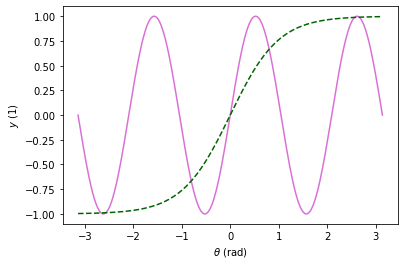

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(-np.pi, np.pi, 500)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen', linestyle='--')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
fig.savefig('my_figure.png') # Export in .jpg, ... also possible

Si vous regardez dans votre explorateur de fichiers à gauche <---, vous pouvez constater qu'un fichier `.png` a bien été créé. Si vous l'ouvrez, vous pourrez probablement constater les problèmes suivants : 

1. La figure est petite et pixellisée. Par défaut, sa taille fait 432 x 288 pixels, ce qui est peu ...
2. L'étiquette des axes $y$ est coupée à gauche.
3. Les polices à l'export ne correspondent pas à celle de Latex.

Nous allons remédier à ces trois problèmes dans l'ordre. Pour s'en sortir, on va devoir -- entre autres -- modifier les paramètres par défaut de Matplotlib, le `plt.rcParams` que j'avais évoqué [précédemment](#pyplot-lui-meme--les-feuilles-de-style). 


##### Réglage de la taille de la figure

Pour régler la taille générale de la figure, on peut utiliser l'option `figsize` lors de la création d'une figure avec `plt.figure()`, ou la régler plus tard avec `fig.set_size_inches()`, qui prennent en entrée les mêmes tableaux à deux éléments `[width, height]`, en _pouces_ (_inches_ en anglais ; 1 pouce = 2.54 cm). Cette taille est la place que devra prendre votre figure dans le document dans lequel elle sera incluse, par exemple votre rapport de stage. 

_Note_ : Pour les amateurs de $\LaTeX$, sachez que vous pouvez connaître la largeur de votre colonne ou de votre texte en écrivant dans votre document $\LaTeX$ les commandes : `\the\columnwidth` ou `\the\textwidth`. Celle-ci vous sera alors donnée en points typographiques (1/72 de pouce ... mais qui donc invente ces unités ?!?). Je vous mets un tableau de conversion ici : 

| Name | cm     | pt    | inch   |
|------|--------|-------|--------|
| cm   | 1      | 28.35 | 0.394  |  
| pt   | 0.0353 | 1     | 0.0139 |  
| inch | 2.54   | 72    | 1      |

Ensuite, à _taille donnée_ de figure, vous pouvez augmenter la _résolution d'impression_ de l'image, c'est à dire le nombre de pixels ou de _points par pouce_ (_dots per inch_ ou `dpi` en anglais, `ppp` en français). Cette option est passée lors de l'appel à `fig.savefig()`. N'hésitez pas à changer la valeur par défaut de $72$ à $200$, voire $250$ ! Reprenons notre code de tout à l'heure :


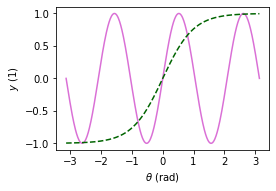

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(-np.pi, np.pi, 500)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
fig.set_size_inches([10/2.54,7/2.54])   # I want my figure to be 10 x 7 cm 
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen', linestyle='--')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
plt.tight_layout()
fig.savefig('my_figure.png', dpi=250) # Export in .jpg, ... also possible

##### Garder les labels en entier

Maintenant que notre figure n'est plus pixellisée, nous pouvons passer aux `labels`. Il existe en fait une solution simple pour éviter que ceux-ci ne soient tronqués. Elle consiste à appeler la fonction `plt.tight_layout()` juste avant d'exporter votre figure. Celle-ci va _décaler tous vos axes_ d'une petite quantité jusqu'à ce que tous les `labels` rentrent dans la `figure`. Cette fonction ne va donc pas changer la taille (en pixels) de votre figure finale. Je vous laisse le placer dans le code ci-dessus et examiner le résultat :-)

##### Obtenir des belles polices 

Enfin, si vous voulez que votre texte soit beau dans le style par défaut de $\LaTeX$, il va falloir trifouiller dans `plt.rcParams`. Cet objet fonctionne un peu comme un dictionnaire, et __s'applique à toutes les figures__. Les clés qui nous intéressent sont : 

* `'text.usetex'` pour afficher le code mathématique $\LaTeX$ en joli (on va le changer de `False` à `True`). Cela va également changer la police des nombres sur les graduations pour les afficher en `Computer Modern`, la police de $\LaTeX$.
* `'font.family'` pour choisir la police de caractères de la figure en dehors du code $\LaTeX$. Vous pouvez alors choisir entre les familles sans empattement (`sans-serif`), avec empattement (`serif`) , à espacement fixe (`monospace`), ... 
* `'font.size'` pour choisir la taille par défaut de la police. Le choix malin est de prendre la même taille que celle de votre document $\LaTeX$ :-) 

Pour modifier `plt.rcParams`, on lui applique la méthode `.update()` et on lui passe un dictionnaire des valeurs que nous voulons mettre à jour. Et comme il change le fonctionnement de tout Matplotlib, on n'a pas besoin de l'appeler pour chacune des prochaines figures. Essayez par exemple de supprimer les lignes de code associées à `plt.rcParams` une fois exécutées au moins une fois :

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# New Matplotlib parameters #######
new_params = {'text.usetex':True,
              'font.family':'serif',
              'font.size':11}
plt.rcParams.update(new_params)
###################################

# Create data
x = np.linspace(-np.pi, np.pi, 500)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
fig.set_size_inches([10/2.54,7/2.54])   # I want my figure to be 10 x 7 cm 
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen', linestyle='--')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
plt.tight_layout()
fig.savefig('my_figure.pdf', dpi=250) # Export in .jpg, ... also possible

__Et voilà__, notre figure est bien belle !

##### Un dernier mot 

Rien ne vous empêche d'enregistrer votre figure dans un format différent de `.png`. Les plus esthètes d'entre vous peuvent exporter __dans des formats 'vectoriels' pour un résultat encore plus propre à l'impression de votre document final__, comme par exemple le `.pdf` (qui impose les polices utilisées par Matplotlib dans votre document final) et le `.eps` (qui lui va essayer d'utiliser les polices de votre document final dans la figure). 

#### Le module `tikzplotlib`

Si, comme moi, vous êtes particulièrement _névrosé_ des figures, vous aurez peut-être envie de les modifier directement dans $\LaTeX$ avant de les inclure dans votre document final. Il n'est pas possible de faire directement cela sous Matplotlib, mais ... il existe ce module fort sympathique qui remédie au problème ! On crée notre figure comme précédemment, et au lieu d'appeler `.savefig()`, on appelle `tikzplotlib.save()` à qui on donne un nom de fichier qui va donc se finir en `.tex`. 

Le module étant encore à un stade peu avancé, il est possible qu'il y ait des bugs. Par exemple, je ne peux pas exporter ma figure si elle contient des pointillés ou des lignes tiretées. Mais vous pourrez très vite remettre tout ça au propre sous TikZ !

In [ ]:
import tikzplotlib 
import matplotlib.pyplot as plt
import numpy as np

# Create data
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(3*x)
z = np.tanh(x)

# Create figure & add plots & labels
fig, ax = plt.subplots()
fig.set_size_inches([10/2.54,7/2.54])   # I want my figure to be 10 x 7 cm 
ax.plot(x, y, color='orchid')
ax.plot(x, z, color='darkgreen')
ax.set_xlabel('$\\theta$ (rad)')
ax.set_ylabel('$y$ (1)')

# Save figure
plt.tight_layout()
tikzplotlib.save('my_tikz_fig.tex')

Si vous jetez un oeil à votre fichier exporté, il devrait ressembler à cela :

![img](./resources/Tikz_export_matplotlib.png)

Les options et le formatage des `Axes` se trouve dans l'encadré vert, et les options et le formatage des `Lines` se trouve après l'instruction `\addplot`, auquel vous pouvez rajouter, par exemple, un `line style=dashed` ou `line style=dotted` qui passe très bien. Si vous êtes motivés, vous pouvez vous référer au manuel fort intimidant, mais quand même excellent de [Pgfplots](https://pgfplots.sourceforge.net/).

Si vous voulez que ce code $\LaTeX$ compile, il va falloir lui ajouter un préambule. Vous pouvez par exemple copier celui que j'utilise en général, et qui est assez exhaustif : 

```
\documentclass[border=1mm]{standalone}
\usepackage[utf8]{inputenc}
\usepackage{tikz}
\usepackage{pgfplots}
\usepackage{graphicx}
\usepackage{amssymb}
\pgfplotsset{compat=1.17}
\usetikzlibrary{arrows.meta}
\usepgfplotslibrary{colorbrewer}
\usetikzlibrary{decorations}
\usepgfplotslibrary{fillbetween}
\begin{document}

```
N'oubliez pas d'ajouter _également_ un `\end{document}` tout en bas de votre fichier TikZ, en tout cas après le `\end{tikzpicture}`.

----------------------------------------------

### Animations et figures interactives

Impossible n'est pas Matplotlib ! Celui-ci est en effet capable de tracer __dans notre environnement__ (cf [FAQ](./FAQ.md)) des figures animées, et des figures interactives, c'est à dire qui vont se mettre à jour quand l'utilisateur va cliquer sur un bouton, régler une valeur, etc. Ces fonctionnalités _avancées_ ne demandent pas beaucoup plus de code, mais prennent généralement un petit bout de temps avant de s'exécuter, il vaut mieux donc être prudent :-)

Dans tous les cas, nous __sommes obligés__ d'utiliser la commande `%matplotlib widget` pour que les animations ou les tracés interactifs fonctionnent correctement. 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib widget

#### Figures animées 

Les figures animées font directement partie de Matplotlib dans le sous-module `matplotlib.animation`. Il va donc falloir que nous l'importions en premier lieu. La syntaxe est ensuite un peu étrange : on va créer la figure, puis une fonction qui va la mettre à jour en fonction d'un indice $i$. Dans mon cas, `update_figure()` va aller écraser les données $x$, $y$ et $z$ dans l'objet `l3d` déjà existant grâce à la méthode `.set.data()` (pour $x$ et $y$) et `set_3d_properties()` (pour $z$). __Elle doit renvoyer tous les objets qui sont mis à jour dans l'animation ; vous pouvez les mettre ensemble dans un tuple, ou dans une liste__.

Il nous reste ensuite à appeler la fonction `anim.FuncAnimation`, qui prend en entrée : 
* la figure à animer, chez nous `fig`.
* `func`, la fonction qui sert à mettre à jour la figure, chez nous on aura `func=update_figure`.
* `frames`, le nombre d'images à calculer, qui peut être un entier ou une liste de valeurs.
* `interval`, l'intervalle (si l'ordinateur est suffisamment rapide) entre deux images en ms.
* `repeat` (vrai ou faux) pour répéter l'animation.
* `blit` (vrai ou faux), pour ne pas retracer l'image en entier à chaque pas d'animation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
import numpy as np

%matplotlib widget

# Function that computes z = f(x,y), works if x, y are scalars, 1d or 2d
def height(X,Y):
    return 3*np.sinc(np.sqrt(X**2+Y**2)) + np.arctan(X+Y)

# Generating surface and line data
x1 = np.linspace(-5,5,200)
y1 = 0*x1
z1 = height(x1,y1)             # Basically z = f(x,0) for my line
[X,Y] = np.meshgrid(x1,x1)    # Creating the mesh with big, 2D X and Y
Z = height(X,Y)             

# Creating the figure, axes, surface and line
fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(projection='3d')
sf = ax.plot_surface(X,Y,Z, cmap='Spectral', alpha=0.5)             # Alpha = 0.5 for transparency
ln1, = ax.plot3D(x1, y1, z1, color='black', linewidth=2)

# Creating a function to update the figure that will be called by the FuncAnimation function
# Basically our function applies a new x, y, z for the line and a nice slow rotation of the camera
def update_figure(frame):           
    y1 = frame*np.ones_like(x1)               # Transforming y value into y 1D array
    ln1.set_data(x1,y1) 
    ln1.set_3d_properties(height(x1,y1))
    return [ln1,]                            # Send back the updated line for FuncAnimation (used below) as a list                           

# Call the animation
my_anim = anim.FuncAnimation(fig, func=update_figure, frames=np.linspace(-5,5,200), interval=50)

__Exercice__ : Ajoutez une deuxième ligne animée perpendiculaire à la première et de couleur grise. Essayez également de coder une belle "rotation" de votre tracé en même temps que la ligne noire se déplace.

_Note_ : La fonction `animation.FuncAnimation` ne vous renverra pas d'erreurs même si la fonction `func`  (dans notre cas, `update_figure()`) plante ... oups ! Si vous voulez être sûr qu'elle ne déocnne pas, commentez la ligne de l'animation et appelez directement `func()` avec une valeur de `frame` au pif. Vous verrez alors si votre fonction passée à `animation.FuncAnimation` plante.

Vous pouvez ensuite transformer votre figure en vidéo, si vous le souhaitez. Dans ce cas, appliquez la méthode `.to_html5_video()` à votre animation, et appelez le tout avec la fonction `HTML` du sous-module `IPython.display` (Jupyter est basé sur IPython). Vous pouvez ensuite sauver l'animation sous format vidéo via les trois points verticaux en bas à droite de l'animation. Parfois, les animations sont un peu saccadées quand il y a beaucoup de choses à afficher, mais ces soucis disparaissent à l'export en vidéo :-)

In [ ]:
from IPython.display import HTML
HTML(my_anim.to_html5_video())

#### Tracés interactifs

Les tracés ci-dessus sont _animés_, mais pas vraiment _interactifs_ : par exemple, je ne peux pas décider de régler la position de ma ligne noire à la souris. Dans cette section, nous allons voir comment faire pour mettre en place des boutons, des ascenseurs, etc., qu'on appelle `widgets` qui nous permettent de modifier des parties d'une figure _une fois tracée_. On va commencer simplement. La syntaxe du programme suivant est assez proche de celle utilisée pour l'animation : 

* on crée les parties statiques de la figure, ici ce qu'il y a sous la fonction `my_gaussian()`
* on crée une fonction qui met à jour la figure / les axes / la ligne à partir de valeurs (ici, `update_figure()` à nouveau)

À la différence de `animation.FuncAnimation`, on va ici appeler la fonction `interact` du module `ipywidgets`. Elle prend en entrée la fonction qui met à jour la figure, `update_figure()`, et on lui passe ensuite tous les paramètres qu'on veut pouvoir régler dans l'animation un par un, dans notre cas `avg` et `std`. 

Vous devrez spécifier les _plages_ de valeurs que peuvent prendre ces paramètres. En fonction de la manière dont vous les spécifiez, `ipywidgets.interact()` va choisir des boutons, des listes déroulantes pour s'adapter au contenu : 

* pour avoir une glissière (_slider_), vous devez écrire `avg=(low_val, hi_val, step)`
* pour obtenir une liste déroulante, vous pouvez lui préciser une `list`, un `range` ou un `np.ndarray` ...
* pour avoir une case à cocher, précisez simplement `True` ou `False`

_Note_ : certains de ces widgets ne fonctionnent pas sous Visual Studio Code mais fonctionnent bien depuis votre navigateur internet. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib widget

# This computes y values of a Gaussian distribution
# for a given x and parameters
def my_gaussian(x, parameters):
    avg, std = parameters
    return 1/(2*np.pi)**0.5/std*np.exp(-(x-avg)**2/(2*std**2))

# Figure setup
fig, ax = plt.subplots()
x = np.linspace(-10,10,500)
y = my_gaussian(x, [0,1])
lin, = ax.plot(x, y, 'k')
ax.set_xlim([-10,10])
ax.set_ylim([0,1])

# Update figure routine
def update_figure(avg=0.0, std=1.0):
    y = my_gaussian(x, [avg,std])
    lin.set_data(x, y)

anim = interact(update_figure, avg=(-5,5,0.1), std=(0.1,3,0.1))

__Exercice__ : Essayez de rajouter deux fonctionnalités à mon tracé interactif, le style du tracé, choisi selon une liste, et sa couleur, choisie également selon une liste déroulante. Si vous ne travaillez pas sous Visual Studio, vous pouvez également essayer d'inclure une boîte de texte qui va mettre à jour le titre ou le `xlabel` de votre figure. 

------------------------------

__Félicitations__ ! Vous êtes maintenant un professionnel de Matplotlib ! Il existe bien sûr quelques autres types de reorésentation graphiques, mais je pense que vous serez capable de les tracer vous-mêmes en lisant [la documentation en ligne de Matplotlib](https://matplotlib.org/stable/api/index.html). Maintenant, vous pouvez également tester les alternatives de Matplotlib: [Bokeh](https://bokeh.org/), [Plotly](https://plotly.com/), [Altaïr](https://altair-viz.github.io/gallery/diverging_stacked_bar_chart.html), ... 😜